<a href="https://colab.research.google.com/github/xpatxj/breeds-of-dogs-classification/blob/main/classification_breeds_of_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U --no-cache-dir gdown --pre
!rm -rf data && mkdir data
!gdown 1tqcc6eXgeg8KdYonvcZlZOX74BHJSlDr -O cbod.zip
!unzip -q cbod.zip -d data


Downloading...
From: https://drive.google.com/uc?id=1tqcc6eXgeg8KdYonvcZlZOX74BHJSlDr
To: /content/cbod.zip
100% 4.25M/4.25M [00:00<00:00, 178MB/s]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import glob
import os
import xml.etree.ElementTree as ET

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
tree = ET.parse('/content/data/classifaction-breeds-of-dogs/annotations.xml')
root = tree.getroot()

for child in root.iter('image'):
    image_name = child.attrib['name'].replace('classifaction-breeds-of-dogs/', '')
    image_label = child[0].attrib['label']

    if not os.path.isdir(f'/content/data/classifaction-breeds-of-dogs/{image_label}'):
        os.mkdir(f'/content/data/classifaction-breeds-of-dogs/{image_label}')

    os.replace(f'/content/data/classifaction-breeds-of-dogs/{image_name}', f'/content/data/classifaction-breeds-of-dogs/{image_label}/{image_name}')

In [ ]:
beagle_count = len(list(glob.glob('data/**/beagle/*.jpg')))
golden_count = len(list(glob.glob('data/**/golden retriever/*.jpg')))
labrador_count = len(list(glob.glob('data/**/labrador/*.jpg')))
owczarek_count = len(list(glob.glob('data/**/owczarek/*.jpg')))
samojed_count = len(list(glob.glob('data/**/samojed/*.jpg')))
yorkshire_count = len(list(glob.glob('data/**/york/*.jpg')))
print(f'{beagle_count} examples of beagles, {golden_count} examples of golden retrievers, {labrador_count} examples of labradors, {owczarek_count} examples of shepherds, {samojed_count} examples of samoyeds, {yorkshire_count} examples of yorkshires to train')

30 examples of beagles, 30 examples of golden retrievers, 30 examples of labradors, 30 examples of shepherds, 30 examples of samoyeds, 30 examples of yorkshires to train


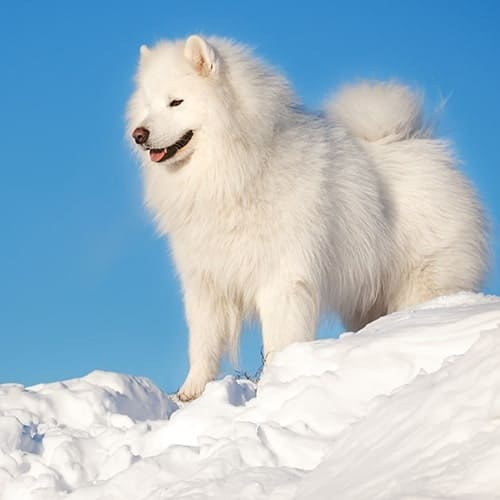

In [ ]:
samojed = list(glob.glob('data/**/samojed/*'))
PIL.Image.open(str(samojed[23]))

In [ ]:
batch_size = 32
class_count = 6

img_height = 64
img_width = 64

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/data/classifaction-breeds-of-dogs',
  validation_split=0.2,
  subset='training',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/data/classifaction-breeds-of-dogs',
  validation_split=0.2,
  subset='validation',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 180 files belonging to 6 classes.
Using 144 files for training.
Found 180 files belonging to 6 classes.
Using 36 files for validation.


In [ ]:
class_names = train_ds.class_names
print(f'class names: {class_names}')

class names: ['beagle', 'golden retriever', 'labrador', 'owczarek', 'samojed', 'york']


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(class_count)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
5/5 [==============================] - 3s 391ms/step - loss: 1.9302 - accuracy: 0.1528 - val_loss: 1.8962 - val_accuracy: 0.0556
Epoch 2/20
5/5 [==============================] - 1s 135ms/step - loss: 1.7850 - accuracy: 0.1528 - val_loss: 1.8222 - val_accuracy: 0.1389
Epoch 3/20
5/5 [==============================] - 1s 126ms/step - loss: 1.7360 - accuracy: 0.2986 - val_loss: 1.8364 - val_accuracy: 0.2222
Epoch 4/20
5/5 [==============================] - 1s 127ms/step - loss: 1.6832 - accuracy: 0.3264 - val_loss: 1.7859 - val_accuracy: 0.1389
Epoch 5/20
5/5 [==============================] - 1s 128ms/step - loss: 1.5606 - accuracy: 0.5000 - val_loss: 1.7949 - val_accuracy: 0.1667
Epoch 6/20
5/5 [==============================] - 1s 131ms/step - loss: 1.3962 - accuracy: 0.5069 - val_loss: 1.8539 - val_accuracy: 0.1389
Epoch 7/20
5/5 [==============================] - 1s 130ms/step - loss: 1.2281 - accuracy: 0.5764 - val_loss: 1.7841 - val_accuracy: 0.2222
Epoch 8/20
5/5 [====

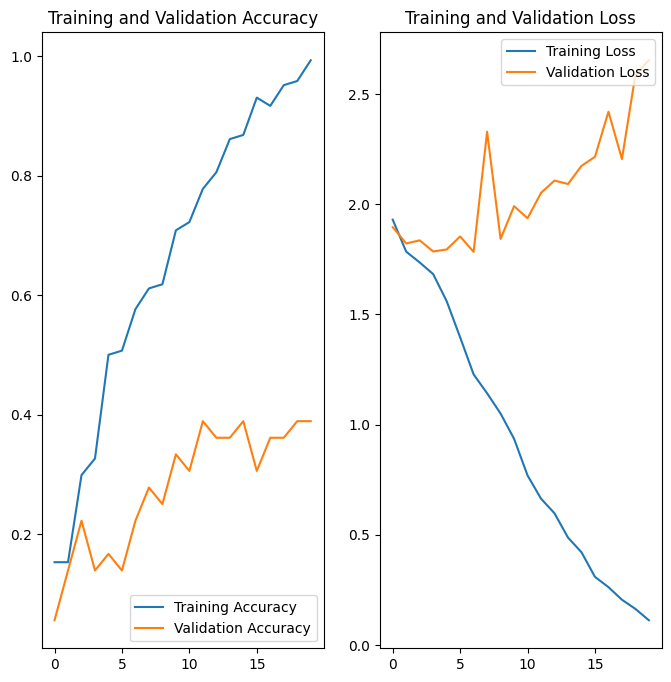

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
def evaluate_model(val_ds, model):
    y_pred = []
    y_true = []

    for batch_images, batch_labels in val_ds:
        predictions = model.predict(batch_images, verbose=0)
        y_pred = y_pred + np.argmax(tf.nn.softmax(predictions), axis=1).tolist()
        y_true = y_true + batch_labels.numpy().tolist()
    print(classification_report(y_true, y_pred))

evaluate_model(val_ds, model)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.44      0.67      0.53         6
           2       0.33      0.17      0.22         6
           3       0.25      0.09      0.13        11
           4       0.57      1.00      0.73         4
           5       0.27      0.43      0.33         7

    accuracy                           0.39        36
   macro avg       0.40      0.48      0.41        36
weighted avg       0.35      0.39      0.34        36

